In [1]:

from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = '/content/drive/MyDrive/tmp 1/Gambo/Train'
validation_dir = '/content/drive/MyDrive/tmp 1/Gambo/Validation'
import os
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(validation_dir):
    raise FileNotFoundError(f"Validation directory not found: {validation_dir}")

train_datagen = ImageDataGenerator(
    rescale=1./255)



validation_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',


)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',

)

Found 151649 images belonging to 3 classes.
Found 15114 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [7]:
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       7,930,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,342,851 (31.83 MB)

 Trainable params: 8,342,851 (31.83 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model 11.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=[checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5303 - loss: 1.0308
Epoch 1: val_loss improved from inf to 0.96486, saving model to best_model 11.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 375s 16s/step - accuracy: 0.5346 - loss: 1.0257 - val_accuracy: 0.6047 - val_loss: 0.9649
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6755 - loss: 0.7606
Epoch 2: val_loss improved from 0.96486 to 0.73355, saving model to best_model 11.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 265s 14s/step - accuracy: 0.6760 - loss: 0.7595 - val_accuracy: 0.6984 - val_loss: 0.7335
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7556 - loss: 0.6231
Epoch 3: val_loss improved from 0.73355 to 0.67835, saving model to best_model 11.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 229s 12s/step - accuracy: 0.7562 - loss: 0.6220 - val_accuracy: 0.7266 - val_loss: 0.6783
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7845 - loss: 0.5838
Epoch 4: val_loss improved from 0.67835 to 0.65911, saving model to 

In [9]:
model.save('my_model 11.keras')
test_dir='//content//drive//MyDrive//tmp 1//Gambo//Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',


)

Found 56723 images belonging to 3 classes.


In [10]:
model.evaluate(
    test_generator,
    batch_size=40,
    steps=20,

)

20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.7811 - loss: 0.5440


[0.4946501851081848, 0.792187511920929]

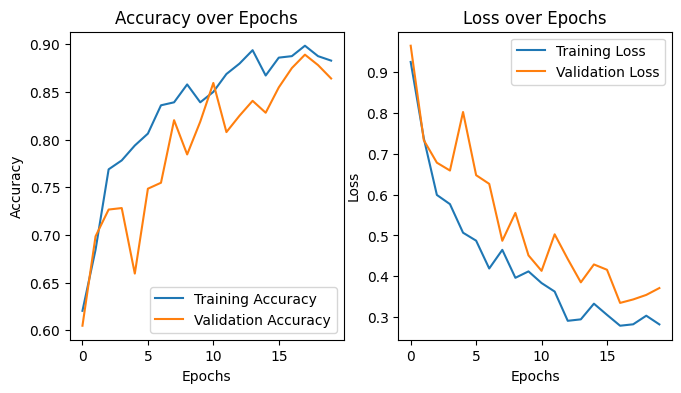

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# تحميل الموديل
model = load_model('my_model 11.keras')

# تحميل ومعالجة الصورة
img_path = '/content/drive/MyDrive/tmp 1/Gambo/Test/Normal/A-41.png'
img = Image.open(img_path).convert('L')  # تحويل الصورة إلى تدرجات الرمادي
img = img.resize((28, 28))  # تغيير حجم الصورة إلى (28, 28) أو الحجم المطلوبل
img_array = image.img_to_array(img)

# تطبيع الصورة إذا كان النموذج يتطلب ذلك (اختياري)
img_array = img_array / 255.0

# إضافة بعد إضافي لتتناسب مع تنسيق دفعات النماذج
img_array = np.expand_dims(img_array, axis=0)

# اختبار الموديل على الصورة المعالجة
predictions = model.predict(img_array)

# عرض النتائج
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
[[0.17047463 0.74561    0.08391543]]
